## GERDA LIGHT
This notebook is meant to test out and use the reduced  version of GERDA.

The "Light" version build upon the synthetic population created with the orginial GERDA by using the agent_information Dataframe (*ai.df) and the contact table p_l_t, which states the location ID for all agents for all timesteps (hours) for one week.

Worklfow:
- create a new world object 
- initialize a model with this world object
- set seed infections
- simulate the model 


PS.: ## - comment,  # - hide lines


In [48]:
import GERDA_light as gl 
import numpy as np
import logging as log
import matplotlib.pyplot as plt
import pandas as pd
import time


In [2]:
logger = log.getLogger()
logger.setLevel(log.INFO)
logger.disabled = True


In [3]:
## initialize a world 
dT1,dT2 = 4,8
k_I = 0.4
w1 = gl.World(
           p_l_t_filepath = 'src/Gangelt_03_new_p_l_t.gz',
           ai_df_filename = 'src/Gangelt_03_new_ai_df.gz',
           clustering=False,
           dT = dT1,
           k_I=k_I,
           )
w2 = gl.World(
           dT=dT2,
           p_l_t_filepath = 'src/Gangelt_03_new_p_l_t.gz',
           ai_df_filename = 'src/Gangelt_03_new_ai_df.gz',
           clustering=False,
           k_I=k_I,
           )

w_old = gl.World(
           dT=1,
           p_l_t_filepath = 'src/Gangelt_03_new_p_l_t.gz',
           ai_df_filename = 'src/Gangelt_03_new_ai_df.gz',
           clustering=False,
           k_I=k_I,
           only_P1=True
           )

In [61]:
w_big_24 = gl.World(
           dT=24,
           p_l_t_filepath = 'src/Gangelt_01_new_p_l_t.gz',
           ai_df_filename = 'src/Gangelt_01_new_ai_df.gz',
           clustering=False,
           k_I=0.2,
           )
model_big = gl.SIS_model(w_big_24)

In [64]:
w_big_1_old = gl.World(
           dT=1,
           p_l_t_filepath = 'src/Gangelt_01_new_p_l_t.gz',
           ai_df_filename = 'src/Gangelt_01_new_ai_df.gz',
           clustering=False,
           k_I=0.2,
           only_P1=True,
           )
model_big_old = gl.SIS_model(w_big_1_old)

In [13]:
if (1)&(not True):
    print('yeah')

In [5]:
'''model = gl.SIS_model(w1)#no clustering
i = 1   # selected agent ID 
model.world.agents[i].state=1 ## infect one agent
model.world.agents[i].times['infection'] = 0 
model.run(timespan=2000, only_inf_rel_contacts=True)'''

"model = gl.SIS_model(w1)#no clustering\ni = 1   # selected agent ID \nmodel.world.agents[i].state=1 ## infect one agent\nmodel.world.agents[i].times['infection'] = 0 \nmodel.run(timespan=2000, only_inf_rel_contacts=True)"

In [5]:
## initialize a model 
model1 = gl.SIS_model(w1)# dT1
model2 = gl.SIS_model(w2)# dT2
model3 = gl.SIS_model(w_old)# dT=1 old infection method, contacts then infection

## infect an agent 
for model in [model1,model2,model3]:
    i = 1   # selected agent ID 
    model.world.agents[i].state = 1 ## infect one agent
    model.world.agents[i].times['infection'] = 0 


In [6]:
## run  simulations
timespan = 400 #in days
model1.run(timespan = int(timespan*24/dT1), only_inf_rel_contacts=True, only_infection=True)
model2.run(timespan = int(timespan*24/dT2), only_inf_rel_contacts=True, only_infection=True)
model3.run(timespan = int(100*24), only_inf_rel_contacts=True, only_infection=False)

In [8]:
model1.world.contacts[1]

[(1, 2, (4.0, 6.0, 4.0)),
 (3, 4, (0.6904761904761905, 0.12698412698412698, 0.0026455026455026454)),
 (3, 5, (0.6666666666666666, 0.1111111111111111, 0.0)),
 (3, 6, (0.6666666666666666, 0.1111111111111111, 0.0)),
 (4, 5, (1.1666666666666665, 0.4444444444444444, 0.05555555555555555)),
 (4, 6, (1.1666666666666665, 0.4444444444444444, 0.05555555555555555)),
 (5, 6, (2.1666666666666665, 1.611111111111111, 0.5)),
 (7, 8, (2.0, 1.0, 0.0)),
 (10, 11, (0.6666666666666666, 0.1111111111111111, 0.0)),
 (10, 12, (0.6666666666666666, 0.1111111111111111, 0.0)),
 (10, 13, (0.6666666666666666, 0.1111111111111111, 0.0)),
 (11, 12, (0.6666666666666666, 0.1111111111111111, 0.0)),
 (11, 13, (0.6666666666666666, 0.1111111111111111, 0.0)),
 (12, 13, (1.6666666666666665, 0.7777777777777777, 0.1111111111111111)),
 (15, 16, (4.0, 6.0, 4.0)),
 (17, 18, (1.0, 0.25, 0.0)),
 (17, 19, (2.0, 1.25, 0.25)),
 (18, 19, (1.0, 0.25, 0.0)),
 (22, 23, (3.0, 3.0, 1.0)),
 (24, 25, (0.7, 0.13333333333333333, 0.0037037037037037

In [33]:
def approximate_PI(p_I:float, p_c: tuple):
    if len(p_c)==3:
        P1 = p_c[0]
        P2 = p_c[1]
        P3 = p_c[2]
        return p_I * P1 - (p_I ** 2) * P2 + (p_I ** 3) * P3

In [34]:
[(x[0],x[1],approximate_PI(0.2,x[2]) )for x in model1.world.contacts[0]]
[(x[0],x[1],approximate_PI(0.2,x[2]) )for x in model2.world.contacts[0]]

TypeError: object of type 'float' has no len()

In [11]:
st=1
contacts_pairs_at_t = [x for x in model1.world.contacts[st] if set((model1.world.agents[x[0]].state,model1.world.agents[x[1]].state))=={0,1}] ## falsch!!!
model

In [7]:
ai_df_1 = model1.world.ai_df
ai_df_2 = model2.world.ai_df
ai_df_3 = model2.world.ai_df
display(ai_df_1.head(5))
display(ai_df_2.head(5))


,home,h_ID,type,age,cluster,household_size,cluster_size,cluster_infection_time,Infection_timing_in_cluster,infection_time
0,225,400,under_age,15,400,4,1,171.0,0,171.0
1,152,265,under_age,16,265,5,1,152.0,0,152.0
2,205,373,public_worker,34,373,2,1,143.0,0,143.0
3,564,1059,adult,53,1059,2,1,187.0,0,187.0
4,100,177,adult,40,177,2,1,117.0,0,117.0


,home,h_ID,type,age,cluster,household_size,cluster_size,cluster_infection_time,Infection_timing_in_cluster,infection_time
0,225,400,under_age,15,400,4,1,73.0,0,73.0
1,152,265,under_age,16,265,5,1,72.0,0,72.0
2,205,373,public_worker,34,373,2,1,73.0,0,73.0
3,564,1059,adult,53,1059,2,1,67.0,0,67.0
4,100,177,adult,40,177,2,1,59.0,0,59.0


Text(0.5, 1.0, 'dT2 = 1 old')

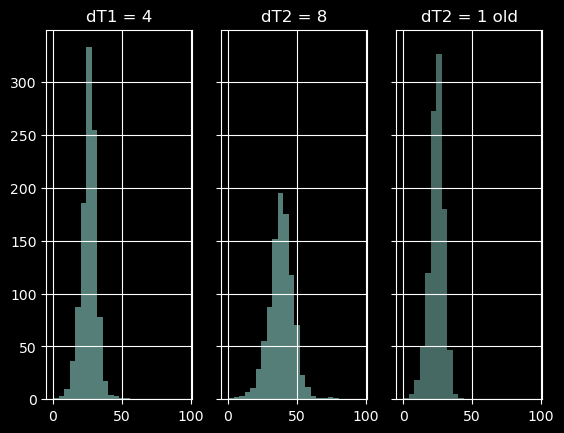

In [8]:
fig, axes = plt.subplots(1,3,sharey=True)

ai_df_1 =  model1.world.ai_df
ai_df_1['infection_day'] = ai_df_1[~ai_df_1['infection_time'].isna()]['infection_time'].map(lambda x: int(x*dT1/24))
ai_df_1['infection_day'].hist(alpha=0.6,label=f'dT = {dT1},', ax = axes[0], bins=np.arange(0,100,4))

ai_df_3 =  model3.world.ai_df
ai_df_3['infection_day'] = ai_df_3[~ai_df_3['infection_time'].isna()]['infection_time'].map(lambda x: int(x/24))
ai_df_3['infection_day'].hist(alpha=0.6,label=f'dT ={1}', ax = axes[1], bins=np.arange(0,100,4))

ai_df_2 =  model2.world.ai_df
ai_df_2['infection_day'] = ai_df_2[~ai_df_2['infection_time'].isna()]['infection_time'].map(lambda x: int(x*dT2/24))
ai_df_2['infection_day'].hist(alpha=0.5, ax = axes[2], bins=np.arange(0,100,4))

axes[0].set_title(f'dT1 = {dT1}')
axes[1].set_title(f'dT2 = {dT2}')
axes[2].set_title(f'dT3 = {1} old')
#plt.xlabel('infection day')
#plt.ylabel('count')
#plt.legend(frameon=False)


In [24]:
dT1,dT2 = 1,24

k_I =0.14

tws = time.time()
w1 = gl.World(
           p_l_t_filepath = 'src/Gangelt_03_new_p_l_t.gz',
           ai_df_filename = 'src/Gangelt_03_new_ai_df.gz',
           clustering=False,
           dT = dT1,
           k_I=k_I,
           )
model1 = gl.SIS_model(w1)
tw1  = time.time()

w2 = gl.World(
           dT=dT2,
           p_l_t_filepath = 'src/Gangelt_03_new_p_l_t.gz',
           ai_df_filename = 'src/Gangelt_03_new_ai_df.gz',
           clustering=False,
           k_I=k_I,
           )
model2 = gl.SIS_model(w2) 
tw2  = time.time()

w_old = gl.World(
           dT=1,
           p_l_t_filepath = 'src/Gangelt_03_new_p_l_t.gz',
           ai_df_filename = 'src/Gangelt_03_new_ai_df.gz',
           clustering=False,
           k_I=k_I,
           only_P1=True
           )
model3 = gl.SIS_model(w_old)
tw3  = time.time() 

print(f'time for generating of model 1 with dT={dT1} : {tw1-tws:.3f}')
print(f'time for generating of model 2 with dT={dT2} : {tw2-tw1:.3f}')
print(f'time for generating of model 3 (old) with dT=1: {tw3-tw2:.3f}')

time for generating of model 1 with dT=1 : 21.820
time for generating of model 2 with dT=24 : 12.472
time for generating of model 3 (old) with dT=1: 11.747


In [26]:
model4 = gl.SIS_model(w_old)

time for simulation of model 1 with dT=1 : 5.477, N infected: 2
time for simulation of model 2 with dT=24 : 3.458 N infected: 843
time for simulation of model 3 (old) with dT=1 : 10.256 N infected: 830
time for simulation of model 1 with dT=1 : 10.978, N infected: 816
time for simulation of model 2 with dT=24 : 3.297 N infected: 843
time for simulation of model 3 (old) with dT=1 : 10.428 N infected: 820
time for simulation of model 1 with dT=1 : 5.355, N infected: 3
time for simulation of model 2 with dT=24 : 1.779 N infected: 2
time for simulation of model 3 (old) with dT=1 : 10.072 N infected: 834
time for simulation of model 1 with dT=1 : 5.348, N infected: 2
time for simulation of model 2 with dT=24 : 3.370 N infected: 820
time for simulation of model 3 (old) with dT=1 : 9.928 N infected: 820
time for simulation of model 1 with dT=1 : 11.339, N infected: 814
time for simulation of model 2 with dT=24 : 3.182 N infected: 870
time for simulation of model 3 (old) with dT=1 : 5.394 N in

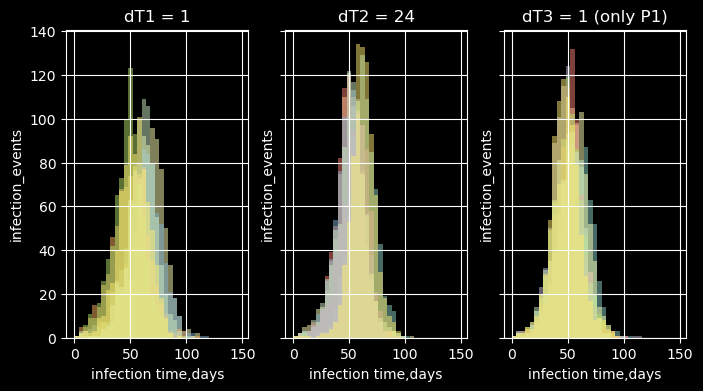

In [55]:
'''dT1,dT2 = 1,24

k_I =0.25

tws = time.time()
w1 = gl.World(
           p_l_t_filepath = 'src/Gangelt_03_new_p_l_t.gz',
           ai_df_filename = 'src/Gangelt_03_new_ai_df.gz',
           clustering=False,
           dT = dT1,
           k_I=k_I,
           )
model1 = gl.SIS_model(w1)
tw1  = time.time()

w2 = gl.World(
           dT=dT2,
           p_l_t_filepath = 'src/Gangelt_03_new_p_l_t.gz',
           ai_df_filename = 'src/Gangelt_03_new_ai_df.gz',
           clustering=False,
           k_I=k_I,
           )
model2 = gl.SIS_model(w2) 
tw2  = time.time()

w_old = gl.World(
           dT=1,
           p_l_t_filepath = 'src/Gangelt_03_new_p_l_t.gz',
           ai_df_filename = 'src/Gangelt_03_new_ai_df.gz',
           clustering=False,
           k_I=0.2,
           only_P1=True
           )
model3 = gl.SIS_model(w_old)
tw3  = time.time() 

print(f'time for generating of model 1 with dT={dT1} : {tw1-tws:.3f}')
print(f'time for generating of model 1 with dT={dT2} : {tw2-tw1:.3f}')
print(f'time for generating of model 1 with dT={dT2} : {tw3-tw2:.3f}')'''

timspan_day = 150
fig, axes = plt.subplots(1,3, figsize=(8,4), sharey=True)
inf_times = []
times_for_sim = {1:[],2:[],3:[]}
inf_n = {1:[],2:[],3:[]}

for k in range(10):
        model1.reset(), model2.reset(), model3.reset()
        i = 1   # selected agent ID 

        time1 = time.time()
        
        model1.world.agents[i].state=1 ## infect one agent
        model1.world.agents[i].times['infection'] = 0
        model1.run(timespan=int(timspan_day*24/dT1),only_infection=True)
        ai_df_1 =  model1.world.ai_df
        #inf_times.append(model1.world.ai_df[['h_ID','infection_time']])
        ai_df_1['infection_day'] = ai_df_1[~ai_df_1['infection_time'].isna()]['infection_time'].map(lambda x: int(x*dT1/24))
        ai_df_1['infection_day'].hist(alpha=0.5, ax = axes[0], bins=np.arange(0,timspan_day,4))
        infected1 = sum(~pd.isna(ai_df_1['infection_time']))  
        time2 = time.time() 

        model2.world.agents[i].state=1 ## infect one agent
        model2.world.agents[i].times['infection'] = 0
        model2.run(timespan=int(timspan_day*24/dT2),only_infection=True)
        #inf_times.append(model2.world.ai_df[['h_ID','infection_time']])
        ai_df_2 =  model2.world.ai_df
        ai_df_2['infection_day'] = ai_df_2[~ai_df_2['infection_time'].isna()]['infection_time'].map(lambda x: int(x*dT2/24))
        ai_df_2['infection_day'].hist(alpha=0.5, ax = axes[1], bins=np.arange(0,timspan_day,4))
        infected2 = sum(~pd.isna(ai_df_2['infection_time'])) 
        time3 = time.time()

        model3.world.agents[i].state=1 ## infect one agent
        model3.world.agents[i].times['infection'] = 0
        model3.run(timespan=int(timspan_day*24), only_infection=True)
        #inf_times.append(model2.world.ai_df[['h_ID','infection_time']])
        ai_df_3 =  model3.world.ai_df
        ai_df_3['infection_day'] = ai_df_3[~ai_df_3['infection_time'].isna()]['infection_time'].map(lambda x: int(x/24))
        ai_df_3['infection_day'].hist(alpha=0.5, ax = axes[2], bins=np.arange(0,timspan_day,4))
        infected3 = sum(~pd.isna(ai_df_3['infection_time']))    
        time4 = time.time()

        inf_n[1].append(infected1)
        inf_n[2].append(infected2)
        inf_n[3].append(infected3)
        times_for_sim[1].append(time2-time1)
        times_for_sim[2].append(time3-time2)
        times_for_sim[3].append(time4-time3)
        print(f'time for simulation of model 1 with dT={dT1} : {time2-time1:.3f}, N infected: {infected1}')
        print(f'time for simulation of model 2 with dT={dT2} : {time3-time2:.3f} N infected: {infected2}')
        print(f'time for simulation of model 3 (old) with dT=1 : {time4-time3:.3f} N infected: {infected3}')

axes[0].set_title(f'dT1 = {dT1}')
axes[1].set_title(f'dT2 = {dT2}')
axes[2].set_title(f'dT3 = 1 (only P1)')

for ax in axes:
    ax.set_ylabel('infection_events')
    ax.set_xlabel('infection time,days')

fig.savefig('plots/dT_test.png', bbox_inches = 'tight')    
     

In [57]:
for m,lt in times_for_sim.items():
    print(f'model:{m},  average_time: {np.mean(lt):.2f}: N infected (average): {np.mean(inf_n[m]):.2f}')

inf_n    

model:1,  average_time: 9.05: N infected (average): 481.70
model:2,  average_time: 2.84: N infected (average): 583.10
model:3,  average_time: 8.79: N infected (average): 579.70


{1: [2, 816, 3, 2, 814, 788, 817, 2, 782, 791],
 2: [843, 843, 2, 820, 870, 3, 5, 783, 839, 823],
 3: [830, 820, 834, 820, 4, 2, 832, 1, 796, 858]}

In [47]:
import pandas as pd
sum(~pd.isna(ai_df_1['infection_time']))

2

time for simulation of model 3 (old) with dT=1 : 15.588
time for simulation of model 4 (old, all contacts) with dT=1 : 33.452


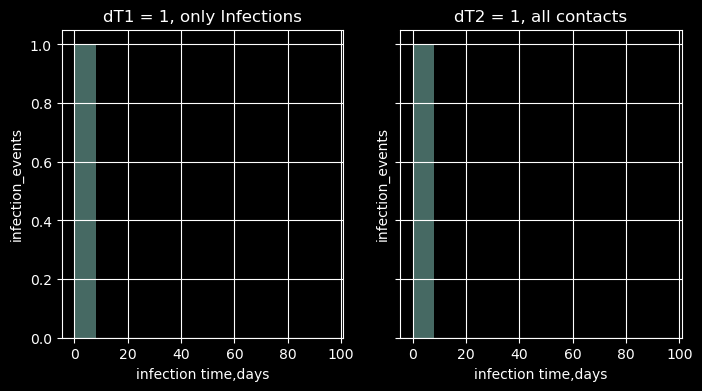

In [65]:

model4.reset(), model3.reset()
fig, axes = plt.subplots(1,2, figsize=(8,4), sharey=True)
timespan_day = 100

time3 = time.time()

model3.world.agents[i].state=1 ## infect one agent
model3.world.agents[i].times['infection'] = 0
model3.run(timespan=int(timespan_day*24), only_infection=True)
#inf_times.append(model2.world.ai_df[['h_ID','infection_time']])
ai_df_3 =  model3.world.ai_df
ai_df_3['infection_day'] = ai_df_3[~ai_df_3['infection_time'].isna()]['infection_time'].map(lambda x: int(x/24))
ai_df_3['infection_day'].hist(alpha=0.5, ax = axes[0], bins=np.arange(0,timespan_day,4))

time4 = time.time()
model4.world.agents[i].state=1 ## infect one agent
model4.world.agents[i].times['infection'] = 0
model4.run(timespan=int(timespan_day*24), only_infection=False, only_inf_rel_contacts=False)
#inf_times.append(model2.world.ai_df[['h_ID','infection_time']])
ai_df_4 =  model4.world.ai_df
ai_df_4['infection_day'] = ai_df_4[~ai_df_4['infection_time'].isna()]['infection_time'].map(lambda x: int(x/24))
ai_df_4['infection_day'].hist(alpha=0.5, ax = axes[1], bins=np.arange(0,timespan_day,4))

time5 = time.time()
print(f'time for simulation of model 3 (old) with dT=1 : {time4-time3:.3f}')
print(f'time for simulation of model 4 (old, all contacts) with dT=1 : {time5-time4:.3f}')

axes[0].set_title(f'dT1 = {1}, only Infections')
axes[1].set_title(f'dT2 = {1}, all contacts')

for ax in axes:
    ax.set_ylabel('infection_events')
    ax.set_xlabel('infection time,days')

fig.savefig('plots/dT_test_inf_rel_cont.png', bbox_inches = 'tight')  


In [72]:
w_big_24 = gl.World(
           dT=24,
           p_l_t_filepath = 'src/Gangelt_01_new_p_l_t.gz',
           ai_df_filename = 'src/Gangelt_01_new_ai_df.gz',
           clustering=False,
           k_I=0.2,
           )
model_big_24 = gl.SIS_model(w_big_24)

In [73]:
w_big_1_old = gl.World(
           dT=1,
           p_l_t_filepath = 'src/Gangelt_01_new_p_l_t.gz',
           ai_df_filename = 'src/Gangelt_01_new_ai_df.gz',
           clustering=False,
           k_I=0.2,
           only_P1=True,
           )
model_big_old = gl.SIS_model(w_big_1_old)

KeyboardInterrupt: 

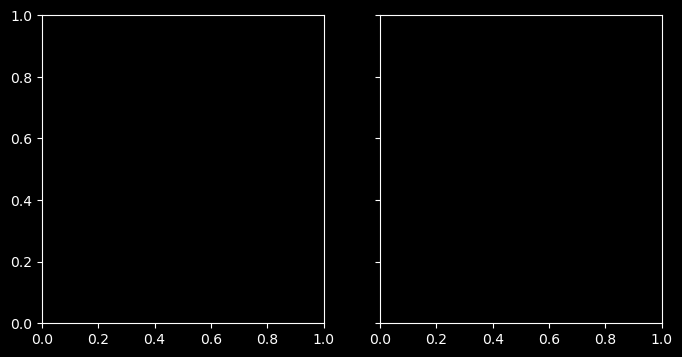

In [75]:

#modelb24.reset(), modelb1_old.reset()
fig, axes = plt.subplots(1,2, figsize=(8,4), sharey=True)
timespan_day = 20

time3 = time.time()

model_big.world.agents[i].state=1 ## infect one agent
model_big.world.agents[i].times['infection'] = 0
model_big.run(timespan=int(timespan_day*24), only_infection=True,only_inf_rel_contacts=True)
#inf_times.append(model2.world.ai_df[['h_ID','infection_time']])
ai_df_3 =  model_big.world.ai_df
ai_df_3['infection_day'] = ai_df_3[~ai_df_3['infection_time'].isna()]['infection_time'].map(lambda x: int(x/24))
ai_df_3['infection_day'].hist(alpha=0.5, ax = axes[0], bins=np.arange(0,timespan_day,4))

time4 = time.time()
model_big_old.world.agents[i].state=1 ## infect one agent
model_big_old.world.agents[i].times['infection'] = 0
model_big_old.run(timespan=int(timespan_day*24), only_infection=False, only_inf_rel_contacts=True)### only infection relevant contacts False geht nicht
#inf_times.append(model2.world.ai_df[['h_ID','infection_time']])
ai_df_4 =  model_big_old.world.ai_df
ai_df_4['infection_day'] = ai_df_4[~ai_df_4['infection_time'].isna()]['infection_time'].map(lambda x: int(x/24))
ai_df_4['infection_day'].hist(alpha=0.5, ax = axes[1], bins=np.arange(0,timespan_day,4))

time5 = time.time()
print(f'time for simulation of big new with dT=1 : {time4-time3:.3f}')
print(f'time for simulation of big (old, all contacts) with dT=1 : {time5-time4:.3f}')

axes[0].set_title(f'dT1 = {24}, big new')
axes[1].set_title(f'dT2 = {1}, big old')

for ax in axes:
    ax.set_ylabel('infection_events')
    ax.set_xlabel('infection time,days')

fig.savefig('plots/dT_big.png', bbox_inches = 'tight')  

In [105]:
timespan_day = 200
dT=24
model_big_24.reset()
model_big_24.world.agents[i].state=1 ## infect one agent
model_big_24.world.agents[i].times['infection'] = 0
model_big_24.run(timespan=int(timespan_day*24/dT), only_infection=True, only_inf_rel_contacts=True)

<Axes: >

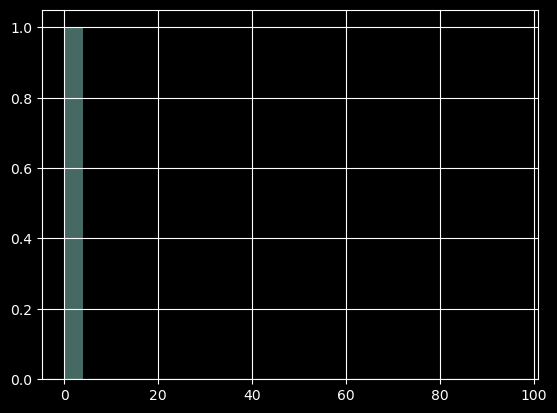

In [ ]:
fig, ax = plt.subplots(1,1)
ai_df_4 =  model_big_24.world.ai_df
ai_df_4['infection_day'] = ai_df_4[~ai_df_4['infection_time'].isna()]['infection_time'].map(lambda x: int(x*dT/24))
ai_df_4['infection_day'].hist(alpha=0.5, ax = ax, bins=np.arange(0,timespan_day,4))

In [103]:
ai_df_4 = model_big_24.world.ai_df
display(ai_df_4.head(8))

,home,h_ID,type,age,cluster,household_size,cluster_size,cluster_infection_time,Infection_timing_in_cluster,infection_time,infection_day
0,2059,4151,adult,32,4151,2,1,NaN,0,NaN,NaN
1,925,1872,adult,33,1872,4,1,NaN,0,NaN,NaN
2,1854,3724,under_age,8,3724,3,1,NaN,0,NaN,NaN
3,956,1924,adult,50,1924,2,1,NaN,0,NaN,NaN
4,1976,3969,adult,26,3969,1,1,NaN,0,NaN,NaN
5,1561,3167,under_age,1,3167,4,1,NaN,0,NaN,NaN
6,2060,4155,public_worker,39,4155,5,1,NaN,0,NaN,NaN
7,854,1733,pensioner,70,1733,2,1,NaN,0,NaN,NaN


In [98]:
model_big_24.world.contacts.keys()

dict_keys([0, 1, 2, 3, 4, 5, 6])